In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df1=pd.read_csv(r"C:\Users\nandh\Downloads\Admission_Predict.csv")
df=pd.read_csv(r"C:\Users\nandh\Downloads\Admission_Predict_Ver1.1.csv")

In [3]:
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.drop("Serial No.",axis=1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.skew()  #finding the distribution

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

# VISUALIZATION

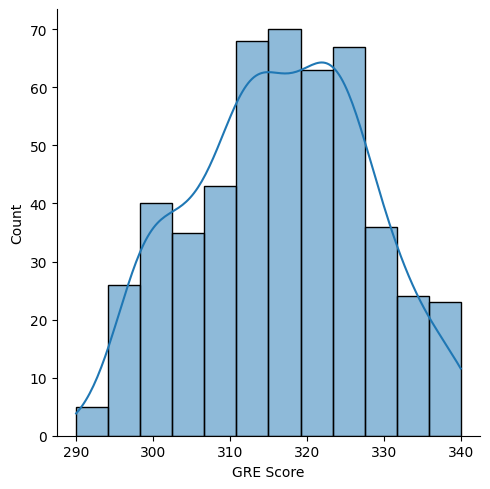

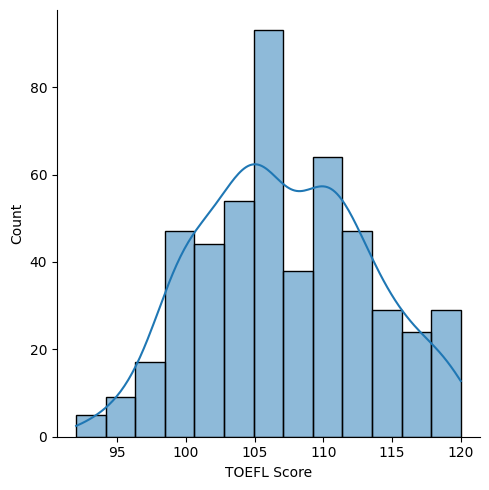

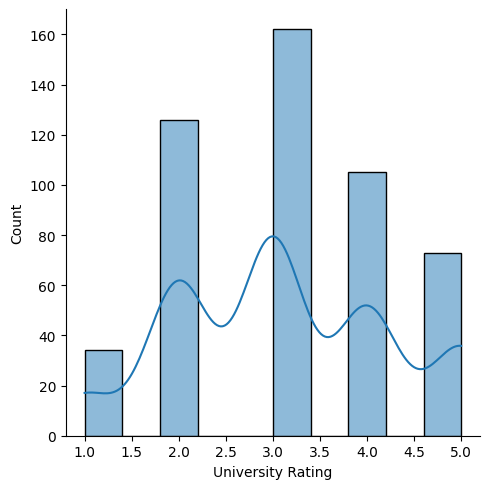

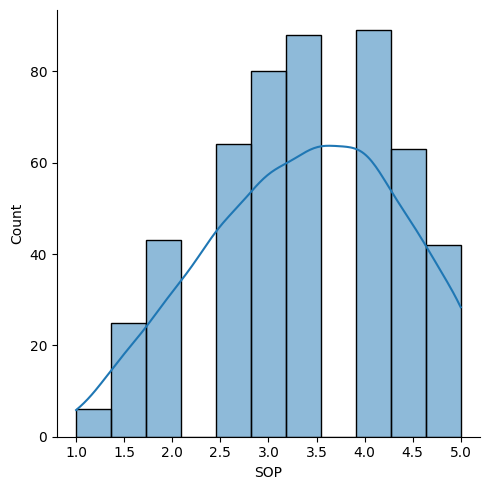

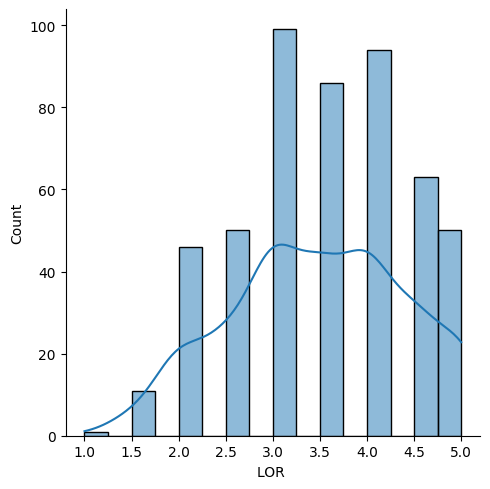

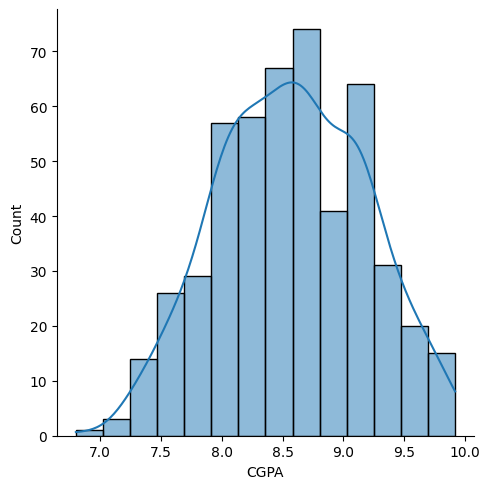

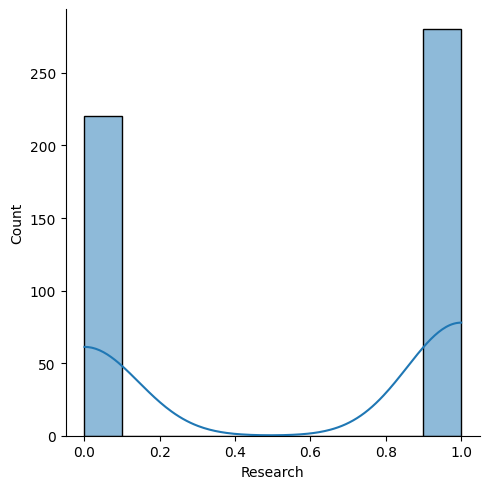

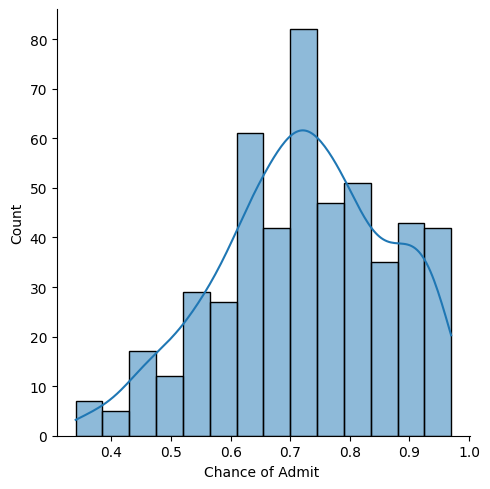

In [10]:
for i in df.columns:         
    sns.displot(x=df[i],kde=True) 

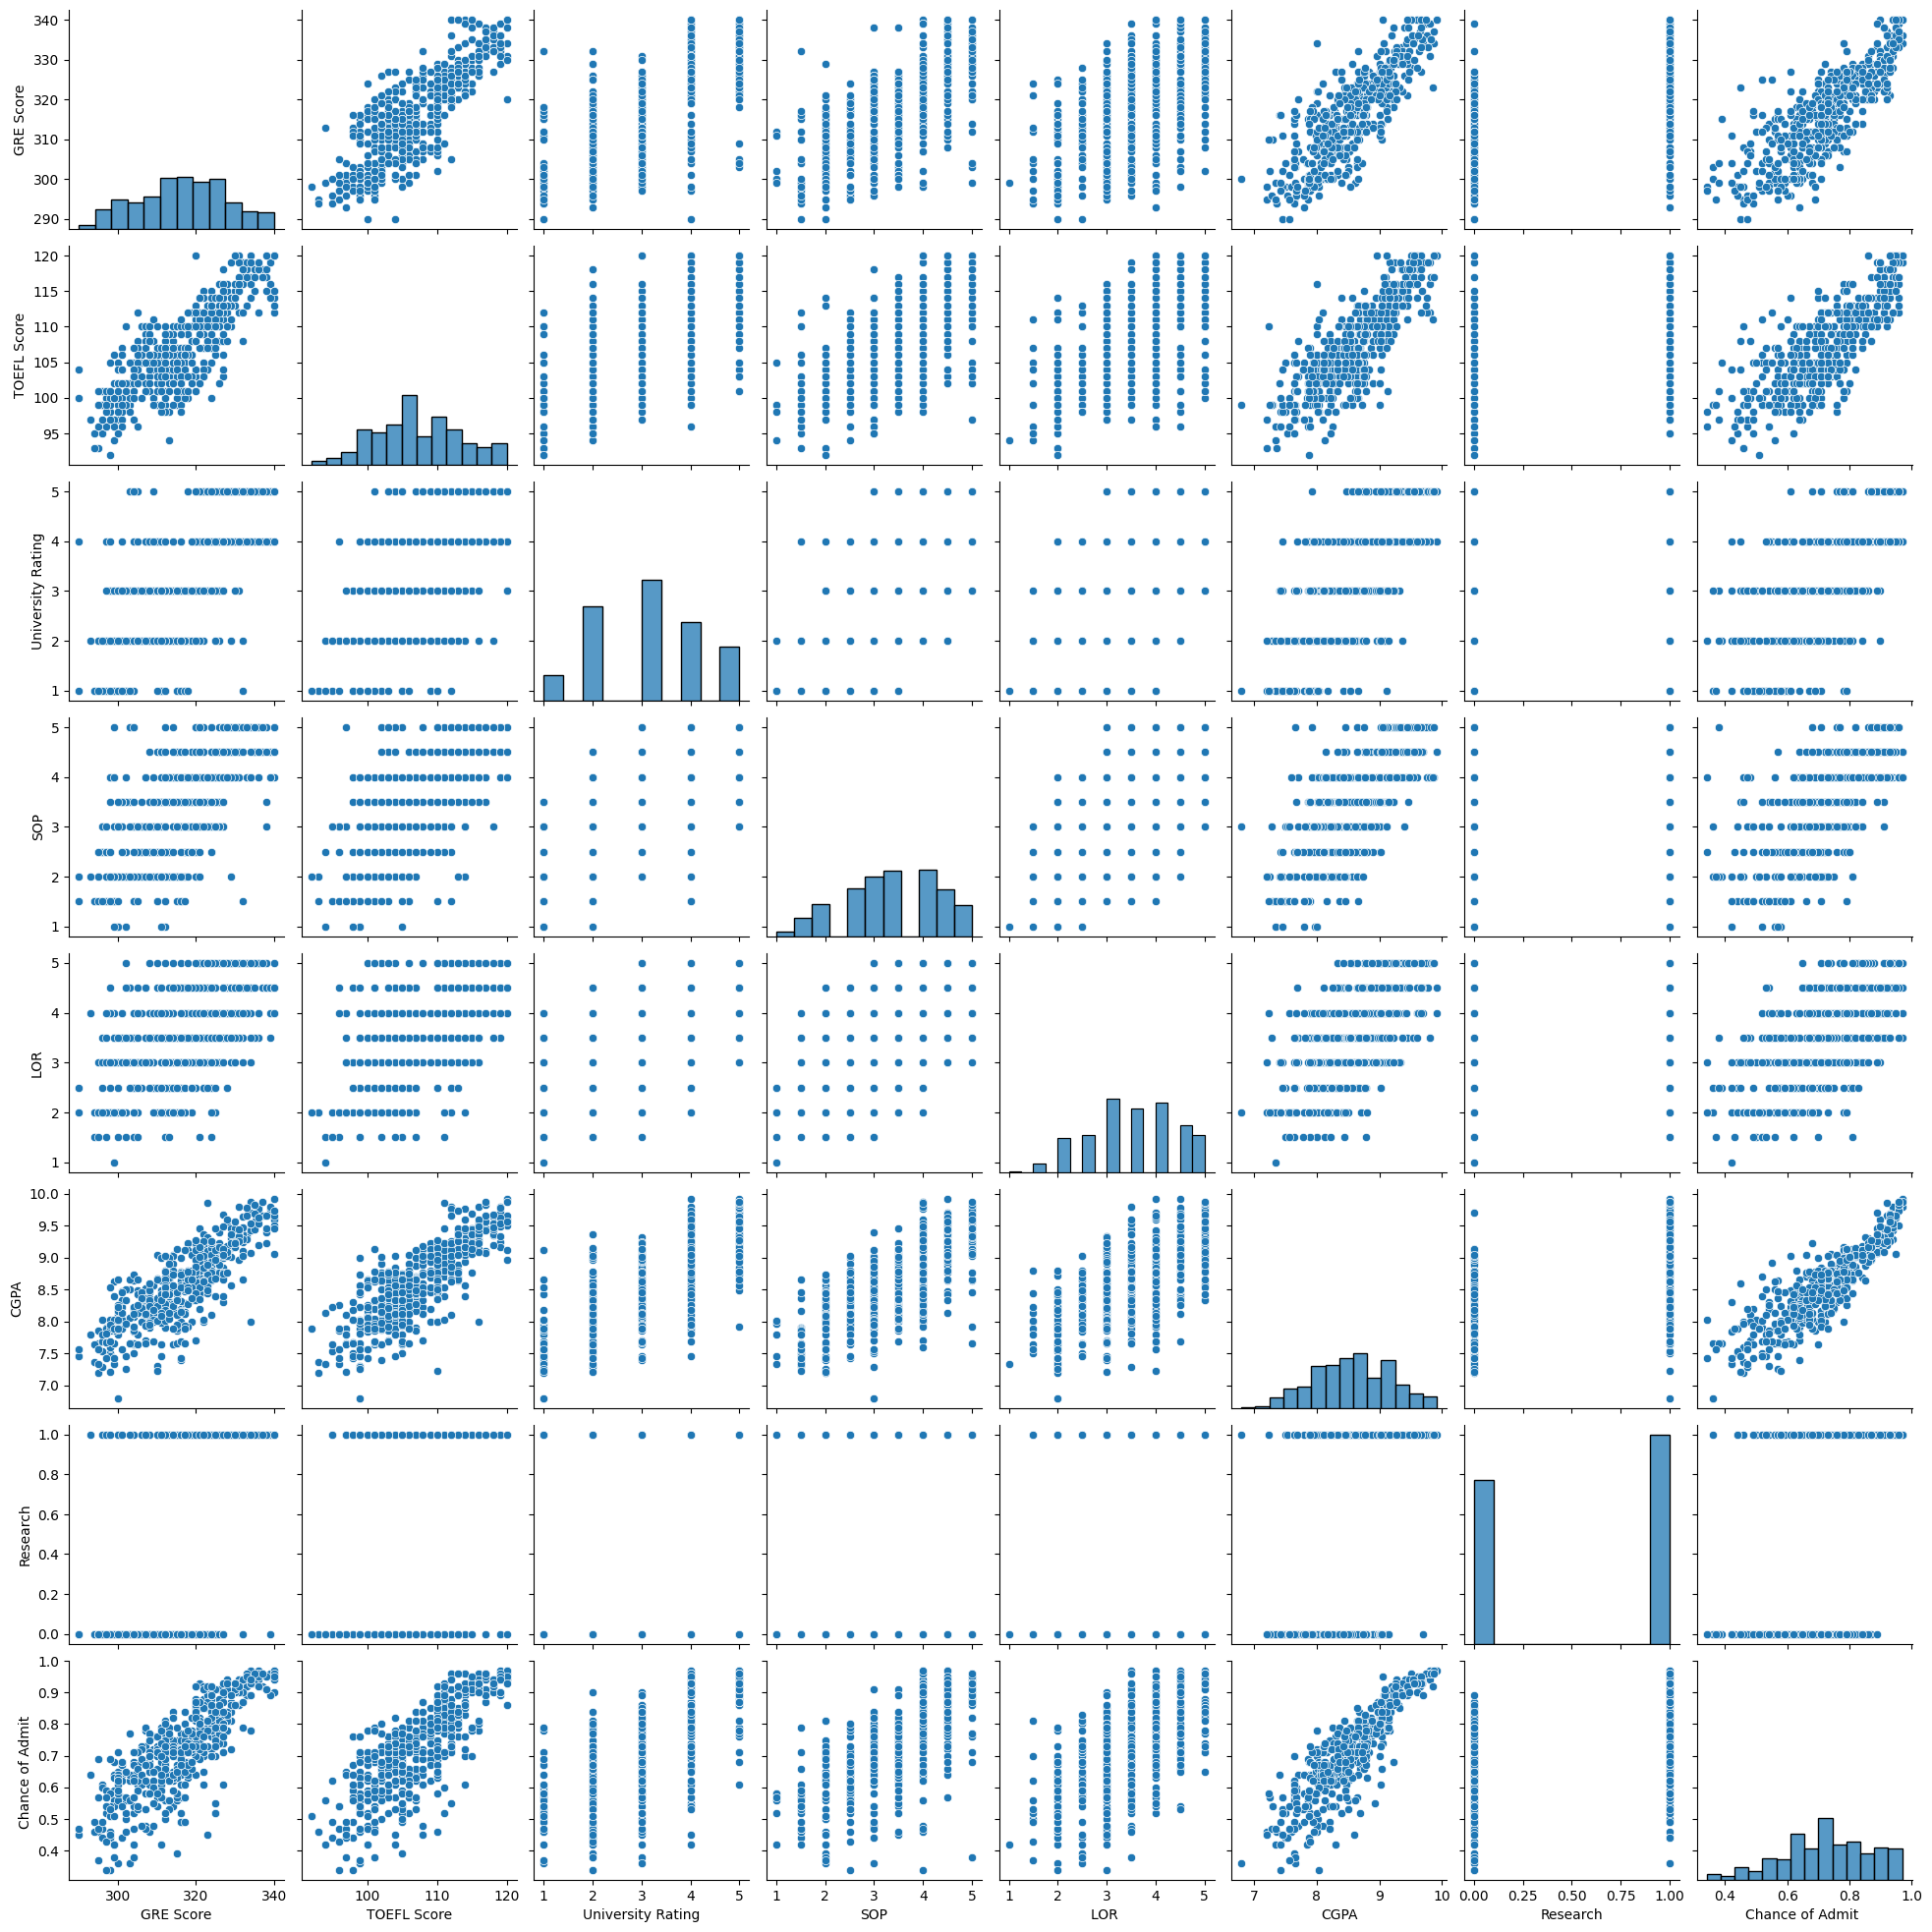

In [11]:
sns.pairplot(df)

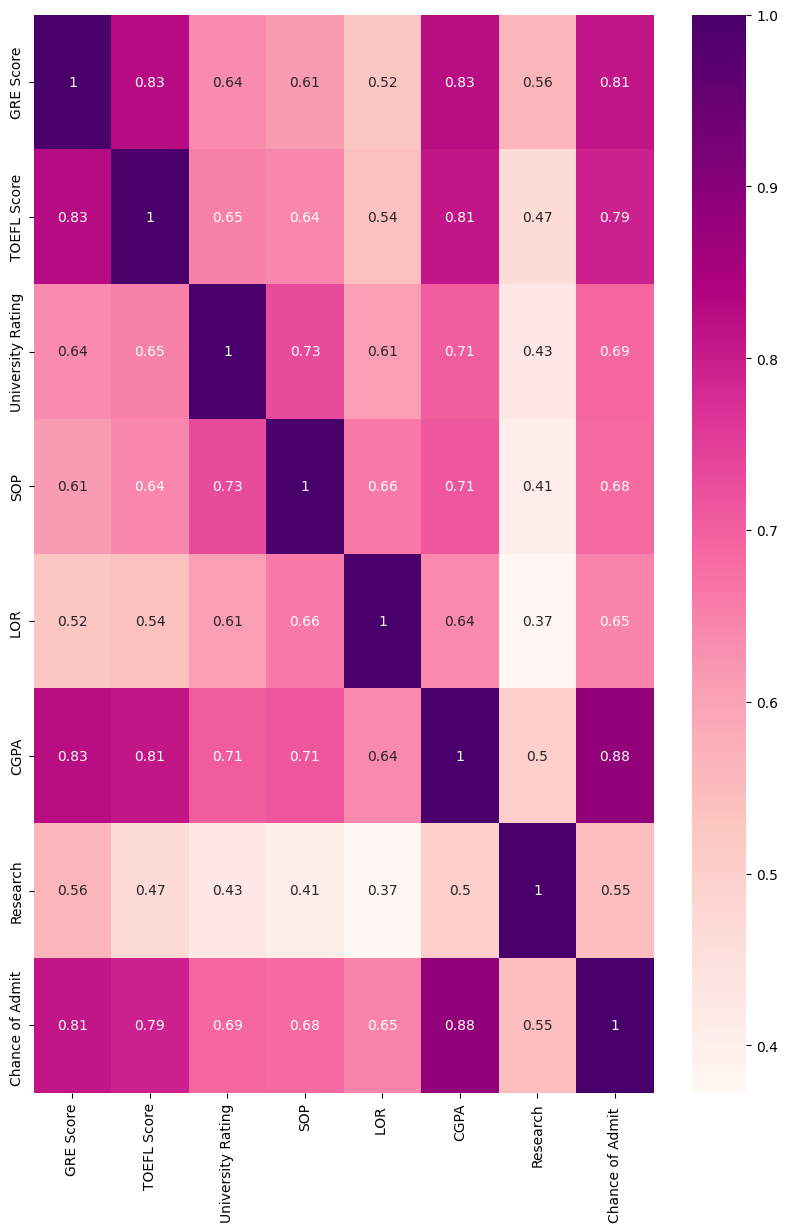

In [12]:
plt.figure(figsize=(10,14))
sns.heatmap(df.corr(),annot=True, cmap='RdPu')
plt.show()

GRE Score and TOEFL Score are highly positevely correlated. One increases as other increases. As Both this Score Increases CGPA also increases, As they are positevely correlated to CGPA.
University Rating Increases with CGPA.
If CGPA increases, Chance of Admit also Increases
GRE, University Rating, TOEFL, and CGPA are most correlated

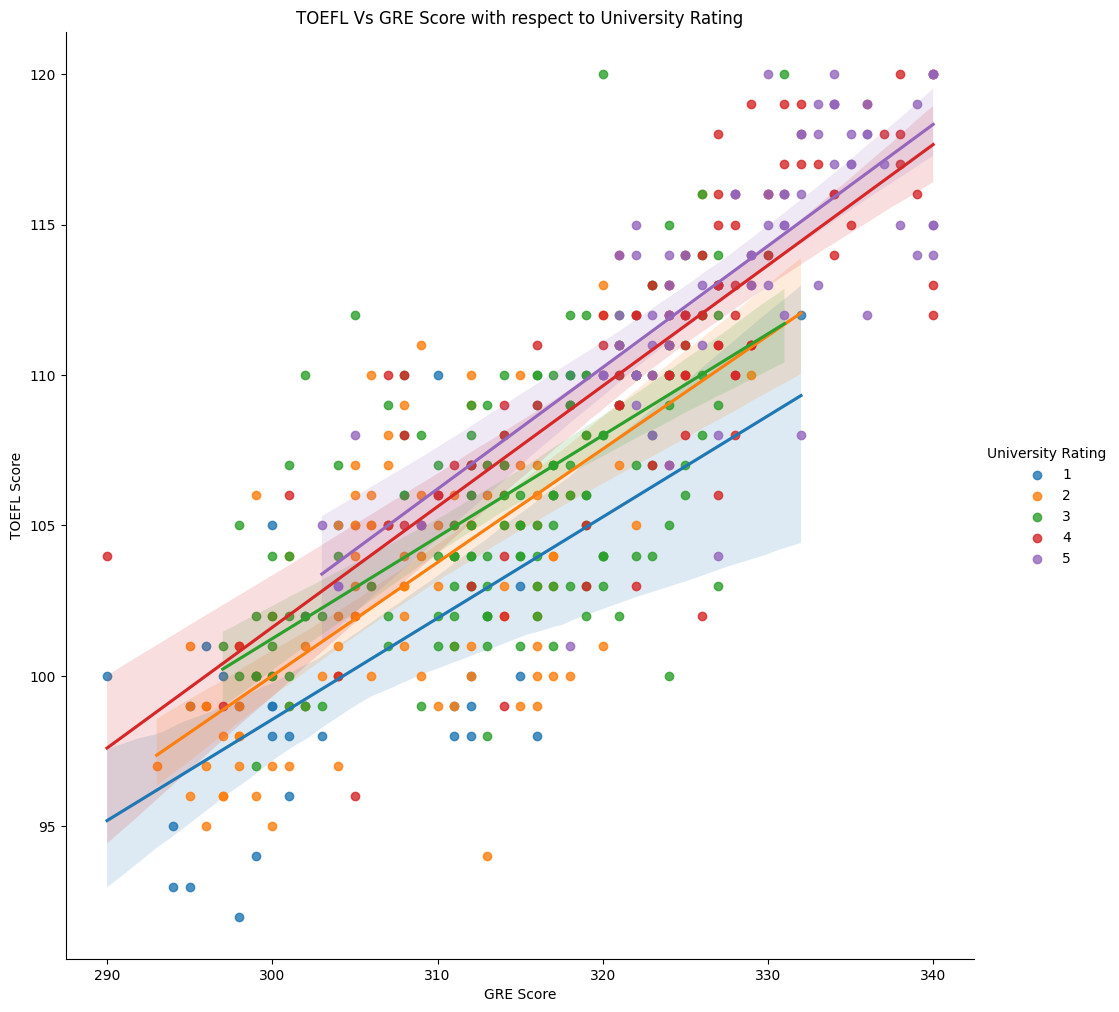

In [13]:
sns.lmplot(x = 'GRE Score', y = 'TOEFL Score', data = df, 
            hue = 'University Rating', height = 10)
plt.title("TOEFL Vs GRE Score with respect to University Rating")
plt.show()

In [14]:
X = df.drop(['Chance of Admit '], axis = 1)  #X consist of the set of features except the target variable
Y = df['Chance of Admit '] >= .85                  #Y is the target variable

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.3, random_state = 7)  #splitting the data set using train_set_split function
#test size defines the propotion of data set allocated for training, random state ensures the split is always the same
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 7)
(350, 7)
(350,)
(150,)


In [16]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
300,309,106,2,2.5,2.5,8.00,0
292,302,99,2,1.0,2.0,7.97,0
283,321,111,3,2.5,3.0,8.90,1
474,308,105,4,3.0,2.5,7.95,1
232,312,107,2,2.5,3.5,8.27,0
...,...,...,...,...,...,...,...
211,328,110,4,5.0,4.0,9.14,1
67,316,107,2,3.5,3.5,8.64,1
25,340,120,5,4.5,4.5,9.60,1
196,306,105,2,3.0,2.5,8.26,0


In [17]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
308,312,108,3,3.5,3.0,8.53,0
13,307,109,3,4.0,3.0,8.00,1
414,321,110,4,3.5,4.0,8.35,1
32,338,118,4,3.0,4.5,9.40,1
460,319,105,4,4.0,4.5,8.66,1
...,...,...,...,...,...,...,...
468,323,110,4,4.0,5.0,8.88,1
268,327,113,4,4.5,5.0,9.14,0
141,332,118,2,4.5,3.5,9.36,1
450,320,112,4,3.0,4.5,8.86,1


In [18]:
Y_train

300    False
292    False
283    False
474    False
232    False
       ...  
211    False
67     False
25      True
196    False
175     True
Name: Chance of Admit , Length: 350, dtype: bool

In [19]:
Y_test

308    False
13     False
414    False
32      True
460    False
       ...  
468    False
268    False
141     True
450    False
324    False
Name: Chance of Admit , Length: 150, dtype: bool

# CLASSIFICATION USING LOGISTIC REGRESSION

In [20]:
# We are going to create a Logistic Regression
logreg=LogisticRegression()

In [21]:
# Let us fit the model
logreg.fit(X_train, Y_train)

c:\users\nandh\appdata\local\programs\python\python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# We also need to predict the model for test 
y_pred = logreg.predict(X_test)

# MODEL EVALUVATION

In [23]:
source=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [24]:
source

,Actual,Predicted
308,False,False
13,False,False
414,False,False
32,True,False
460,False,False
...,...,...
468,False,False
268,False,False
141,True,False
450,False,False


In [25]:
metrics.accuracy_score(Y_test,y_pred) 

0.9533333333333334

In [26]:
metrics.precision_score(Y_test,y_pred)

0.9032258064516129

In [27]:
metrics.recall_score(Y_test,y_pred)

0.875

### MODEL HAS AN ACCURACY OF 0.95 AND PRECISION OF 0.90 
## CLASSIFICATION REPORT AND CONFUSION MATRIX ARE AS BELOW

In [28]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       118
        True       0.90      0.88      0.89        32

    accuracy                           0.95       150
   macro avg       0.93      0.92      0.93       150
weighted avg       0.95      0.95      0.95       150



In [29]:
metrics.confusion_matrix(Y_test,y_pred)

array([[115,   3],
       [  4,  28]], dtype=int64)